                                                                                                            Aiswarya K H
                                                 PWP CIA 3                                                       1928028

# Analysis of factors influencing the Campus Recruitment through Exploratory Data Analysis

Problem Statement:
Understanding the factors which influences the placement of students. Also the salary package.

Objective:

-> To understand the factors influencing the placement.

-> To understand what factors contribute to the salary package of an MBA student.


In [33]:
# importing the required packages
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

# Importing Data 

In [34]:
#importing the dataset
d1 = pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class.csv')

In [35]:
#Gives Overview of the data
d1.describe()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [36]:
#displays the first few rows of the dataset
d1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [37]:
#So this dataset is about the factors affecting the placements, i.e., Gender, ssc %, ssc board, hsc %, hsc board, degree %, degree stream,
#Work experience, Entrance test percentage, Specialization, Mba percentage. - these are the independent variables 
# The dependent variable here is Placement status & Salary

# Data cleaning and Preprocessing

In [38]:
#Placement status and workex can be converted into integers for better analysis using lambda function apply().
#Coding: Workex: yes-1, no-0
#Placement status: yes-1, no-0
d1['status'] = d1['status'].apply(lambda x:1 if x == 'Placed' else 0)
d1['workex'] = d1['workex'].apply(lambda x:1 if x == 'Yes' else 0)

In [39]:
#displays the max salary
d1.salary.max()


940000.0

In [40]:
#displays the min salary
d1.salary.min()

200000.0

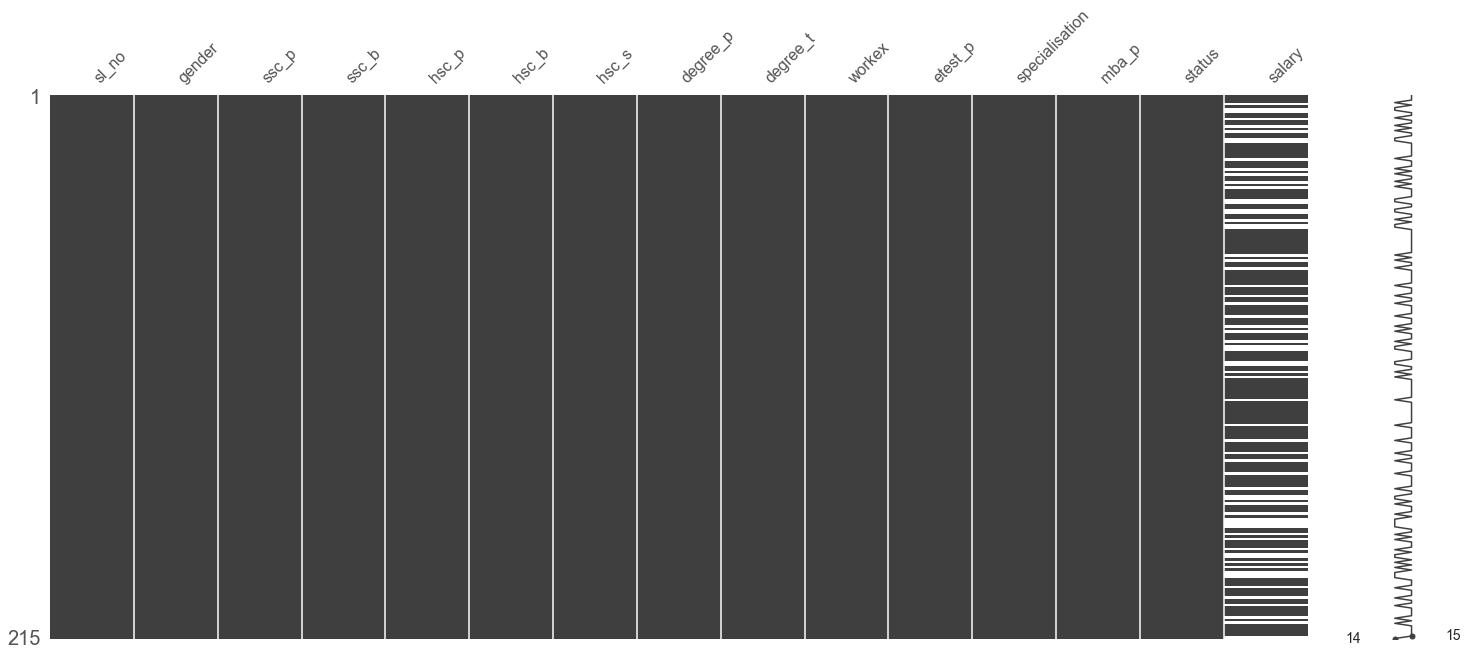

In [41]:
#missing value plot
msno.matrix(d1)

In [42]:
#There is missing values only in the salary, it may be because students were not placed
#So the dataset can be divided into two: Placed and not placed.

In [43]:
placed_df = d1[d1['status']==1]
not_placed = d1[d1['status']==0]

# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020951FD7EB8>,
      dtype=object)

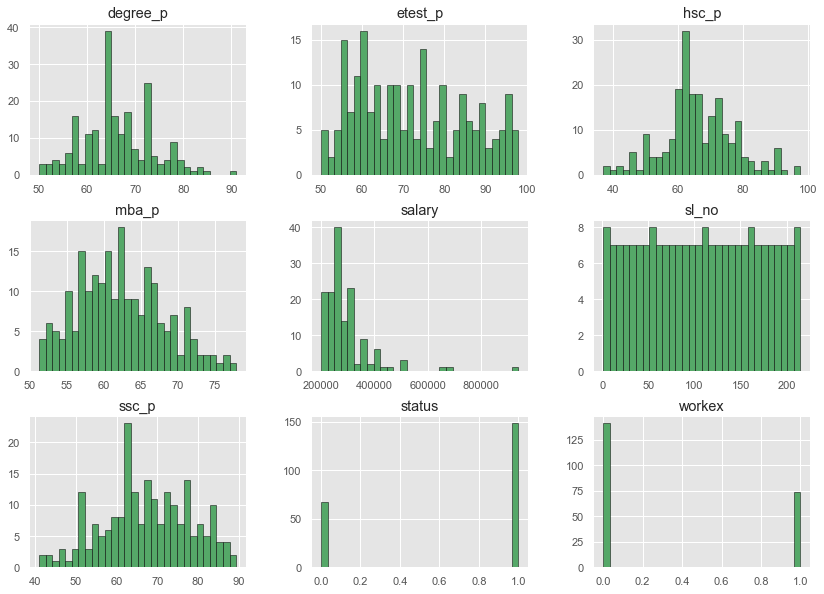

In [44]:
#Histograms are plotted to understand the distribution of the data
d1.hist(bins=30,color='g',figsize=(14,10),ec="black")

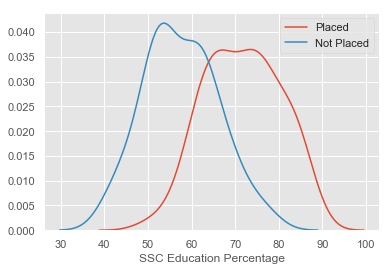

In [45]:
#Kernel-Density Plot for SSC % vs Placement
sns.kdeplot(d1.ssc_p[ d1.status==1])
sns.kdeplot(d1.ssc_p[ d1.status==0])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("SSC Education Percentage")
plt.show()
# It is seen that the students with better ssc percentage performed better.
# We could see a drop just before 50%, this indicates that the minimum percentage required for the placement is 50% in ssc

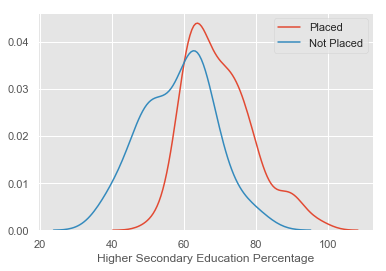

In [46]:
#Kernel-Density Plot for HSC % vs Placement
sns.kdeplot(d1.hsc_p[ d1.status==1])
sns.kdeplot(d1.hsc_p[ d1.status==0])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

#This plot indicates that more placements are above 60%
# Also we could see a drop just before 60%, this indicates that the minimum percentage required for the placement is 60%

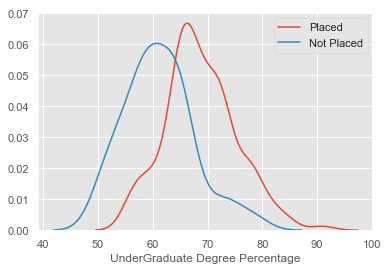

In [47]:
#Kernel-Density Plot for Degree % vs Placement
sns.kdeplot(d1.degree_p[ d1.status==1])
sns.kdeplot(d1.degree_p[ d1.status==0])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("UnderGraduate Degree Percentage")
plt.show()
# It is seen that the students with better degree percentage have performed better.


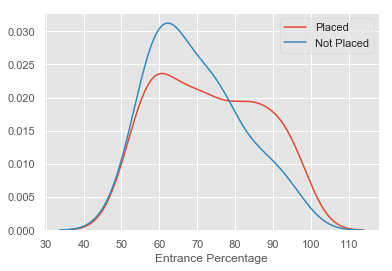

In [48]:
#Kernel-Density Plot for Degree % vs Placement
sns.kdeplot(d1.etest_p[ d1.status==1])
sns.kdeplot(d1.etest_p[ d1.status==0])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Entrance Percentage")
plt.show()
# It is seen that the entrance test percentage doesn't matters much for the placements

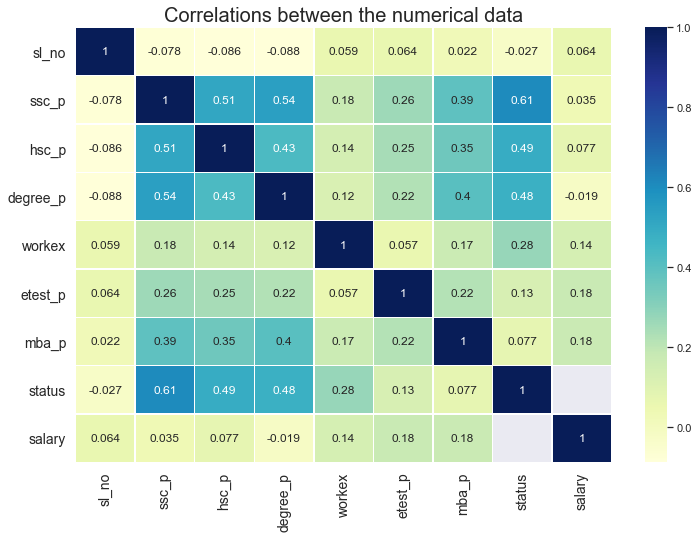

In [49]:
# To check the correlations between the numerical data
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
correlations = d1.corr()
sns.heatmap(correlations,cmap="YlGnBu",linewidths=.5, annot=True)

plt.xticks(fontsize=14, rotation = 90)
plt.yticks(fontsize=14, rotation = 0)
plt.title('Correlations between the numerical data', fontsize=20)
plt.show()
#On analyzing the correlation plot, it is found out that the percentages of ssc, hsc and degree are correlated to the placements

In [50]:
#Column charts of placement status with respect to Gender, SSC board, Hsc board, HSC stream, Degree stream, Specialization 
# and Work Experience

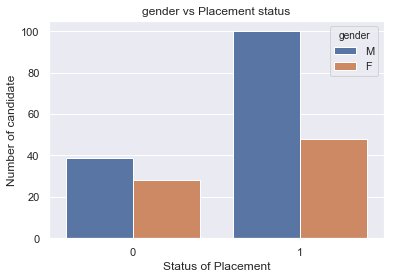

In [51]:
sns.countplot(x="status", data=d1, hue='gender')
plt.title("gender vs Placement status")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()

#On analyzing the column chart it is found out that male students are placed comparatively higher than the female students

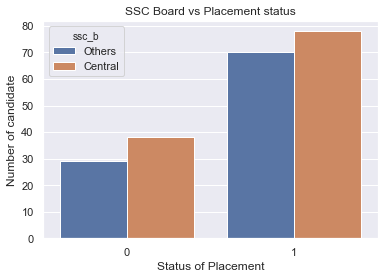

In [52]:
sns.countplot(x="status", data=d1, hue='ssc_b')
plt.title("SSC Board vs Placement status")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()
#On analyzing, it is found out that SSC board has less influence in the placement

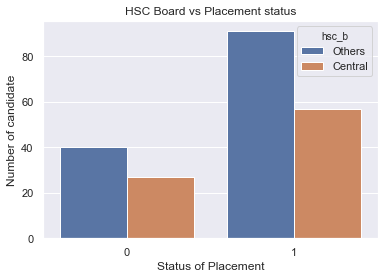

In [53]:
sns.countplot(x="status", data=d1, hue='hsc_b')
plt.title("HSC Board vs Placement status")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()
# More students from  hsc board other than the Central board is placed

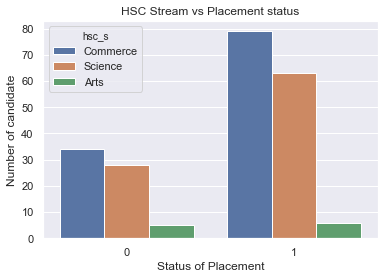

In [54]:
sns.countplot(x="status", data=d1, hue='hsc_s')
plt.title("HSC Stream vs Placement status")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()
# Most of the students placed have their hsc stream as Commerce, followed by Science and then the least is Arts

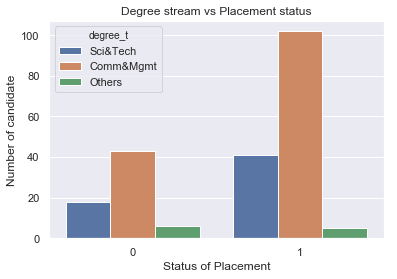

In [55]:
sns.countplot(x="status", data=d1, hue='degree_t')
plt.title("Degree stream vs Placement status")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()
#The more number of students placed have their degree stream as Commerce& Management.

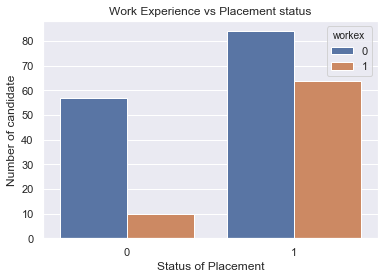

In [56]:
sns.countplot(x="status", data=d1, hue='workex')
plt.title("Work Experience vs Placement status")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()
# On analyzing it is found out that work experience has got little significance in placement, as most students without work experience have placed.

In [57]:
# Plotting MBA Specialization vs Placement status

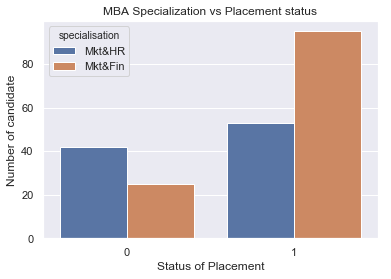

In [58]:
sns.countplot(x="status", data=d1, hue='specialisation')
plt.title("MBA Specialization vs Placement status")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()
# From the above graph it is found out that Students placed from Marketing&Finance is comparatively higher than the students from Marketing&HR

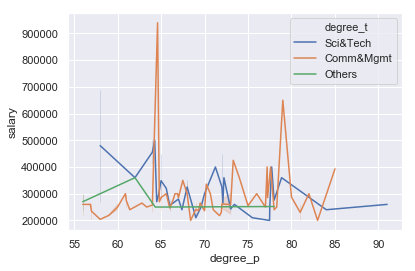

In [59]:
#Line plot for analyzing the salary with respect to degree stream & degree percentage
sns.lineplot( "degree_p","salary", hue="degree_t", data=d1)
plt.show()

#On analyzing the graph, it is found out that the students who took Commerce& Management in UG and in the range of 65% have comparatively higher package than Sci&Tech, Arts students

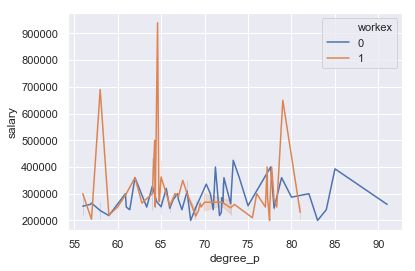

In [60]:
#Line plot for analyzing the salary with respect to degree% and Work experience
sns.lineplot("degree_p", "salary", hue="workex", data=d1)
plt.show()

#On analyzing the graph, it is found out that the students with work experience and of degree percentage 65% have comparatively higher package than students with no work experience

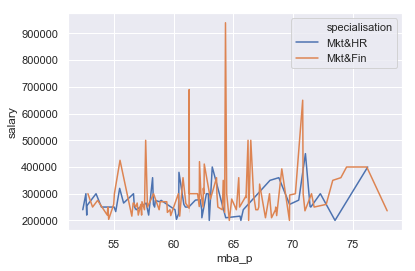

In [61]:
#Line plot for analyzing the salary with respect to specialisation
sns.lineplot("mba_p", "salary", hue="specialisation", data=d1)
plt.show()

#On analyzing the graph, it is found out that the Marketing&Finance students with 65% have comparatively higher package than Mkt&HR students

# Findings

=> On analyzing the correlation plot, it is found out that the percentages of ssc, hsc and degree are correlated to the placements. So, these percentages have influence on the placements.(i.e., getting placed or not).

=> On analyzing the column chart it is found out that male students are placed comparatively higher than the female students.

=> On analyzing, it is found out that SSC board has less influence in the placement.

=> Most of the students placed have their hsc stream as Commerce, followed by Science and then the least is Arts.

=> The more number of students placed have their degree stream as Commerce& Management.

=> The work experience has got little significance in placement, as most students without work experience have placed.

=> The Students placed from Marketing&Finance is comparatively higher than the students from Marketing&HR.

=> The salary is not influenced by these percentages(ssc%, hsc%, degree%, mba%).

=> It is found out that, Marketing&Finance students with 65% have comparatively higher package than Mkt&HR students.

=> The students with work experience and of degree percentage 65% have comparatively higher package than students with no work experience.

=> It is found out that the students who took Commerce& Management in UG and in the range of 65% have comparatively higher package than Sci&Tech, Arts students.